<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas/blob/main/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install statsmodels --upgrade
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm


Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [53]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

# Simulando series



In [54]:
randomvar=[20*np.random.normal() for x in range(1, 100)]
counter=[x for x in range(1, 100)]
tendencia=[4*x for x in range(1, 100)]
df=pd.DataFrame({'counter': counter, 'randomvar':randomvar, 'tendencia':tendencia}) #Puedo armar un dataframe pasando un diccionario
df.head()

,counter,randomvar,tendencia
0,1,19.903672,4
1,2,31.872092,8
2,3,-4.190815,12
3,4,-3.849091,16
4,5,-14.582121,20


In [55]:
df['serie1']=df.tendencia+randomvar
df.head()

,counter,randomvar,tendencia,serie1
0,1,19.903672,4,23.903672
1,2,31.872092,8,39.872092
2,3,-4.190815,12,7.809185
3,4,-3.849091,16,12.150909
4,5,-14.582121,20,5.417879


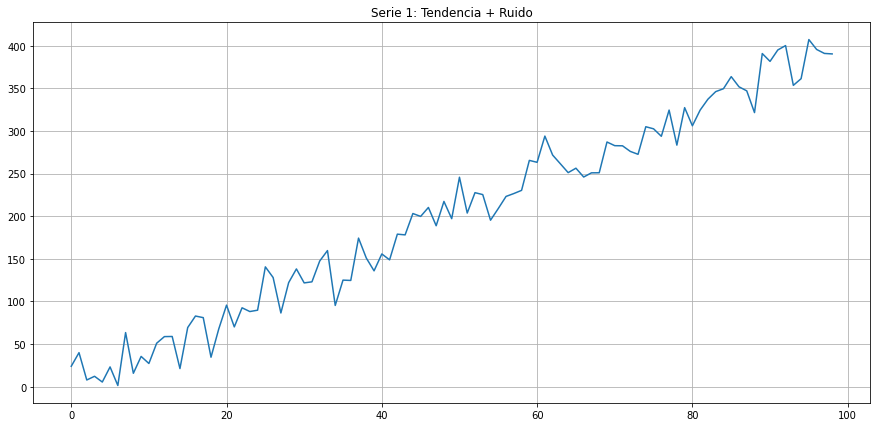

In [56]:
plt.figure(figsize=(15, 7))
plt.plot(df.serie1)
plt.title('Serie 1: Tendencia + Ruido')
plt.grid(True)
plt.show()

In [57]:
df['shock']=0
df.loc[df.counter==30,'shock']=200
df['serie2']=df.tendencia+df.randomvar+df.shock

In [58]:
def grafico(serie, titulo):
  """Funcion que grafica una serie
  param serie: serie a graficar
  param titulo: pasar un titulo
  """

  plt.figure(figsize=(15, 7))
  plt.plot(serie)
  plt.title(titulo)
  plt.grid(True)
  plt.show()

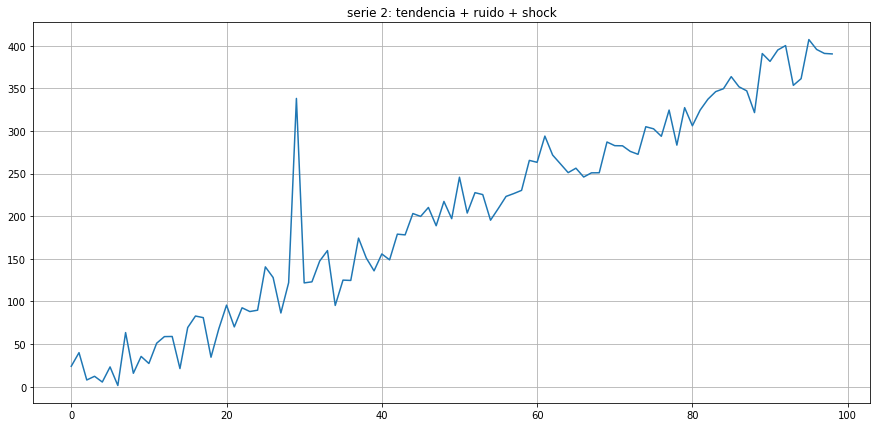

In [59]:
grafico(df.serie2, 'serie 2: tendencia + ruido + shock')

In [60]:
df.head()

,counter,randomvar,tendencia,serie1,shock,serie2
0,1,19.903672,4,23.903672,0,23.903672
1,2,31.872092,8,39.872092,0,39.872092
2,3,-4.190815,12,7.809185,0,7.809185
3,4,-3.849091,16,12.150909,0,12.150909
4,5,-14.582121,20,5.417879,0,5.417879


In [61]:
# Shock autocorrelacionado
df.loc[0,'shockautocorr']=df.loc[0,'shock']
for i in range(1, len(df)):
  df.loc[i, 'shockautocorr'] = df.loc[i-1, 'shockautocorr'] * 0.8  + df.loc[i, 'shock']
df.series3=df.tendencia+df.randomvar+df.shockautocorr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [62]:
df.head()

,counter,randomvar,tendencia,serie1,shock,serie2,shockautocorr
0,1,19.903672,4,23.903672,0,23.903672,0.0
1,2,31.872092,8,39.872092,0,39.872092,0.0
2,3,-4.190815,12,7.809185,0,7.809185,0.0
3,4,-3.849091,16,12.150909,0,12.150909,0.0
4,5,-14.582121,20,5.417879,0,5.417879,0.0


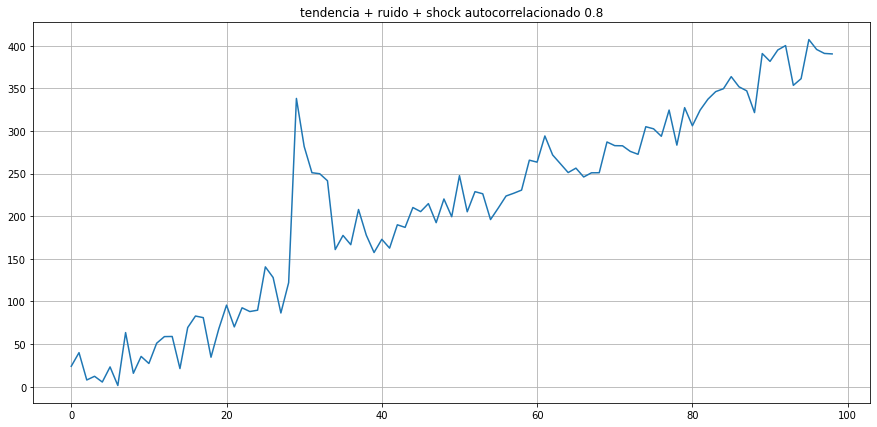

In [63]:
grafico(df.series3, 'tendencia + ruido + shock autocorrelacionado 0.8')

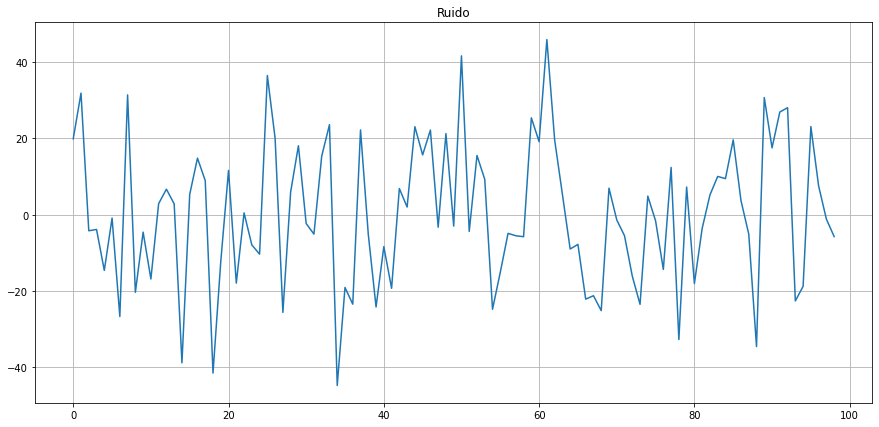

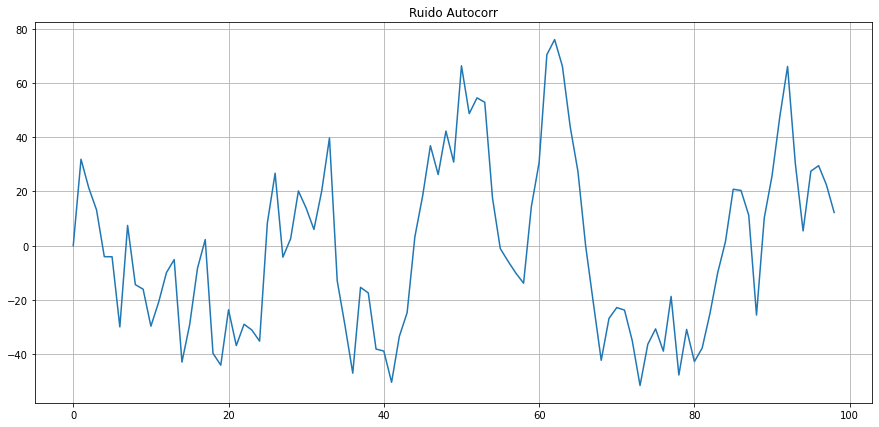

(-9.002100308048568,
 6.456095830449297e-15,
 {'1%': -3.4989097606014496,
  '10%': -2.5827604414827157,
  '5%': -2.891516256916761},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7fe213a33780>)

In [64]:
# Ruido vs ruido autocorrelacionado
df.loc[0, 'ruidoautocorr']=0
for i in range(1, len(df)):
  df.loc[i, 'ruidoautocorr'] = df.loc[i-1, 'ruidoautocorr'] * 0.8  + df.loc[i, 'randomvar']
grafico(df.randomvar, 'Ruido')
grafico(df.ruidoautocorr, 'Ruido Autocorr')
sm.tsa.stattools.adfuller(df.randomvar, regresults=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


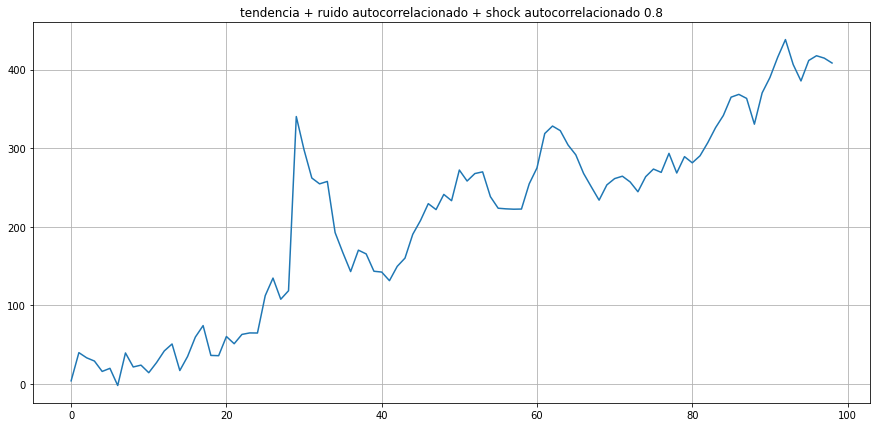

In [65]:
df.series4=df.tendencia+df.ruidoautocorr+df.shockautocorr
grafico(df.series4, 'tendencia + ruido autocorrelacionado + shock autocorrelacionado 0.8')

# Ajustando Series


In [66]:
df=pd.read_excel('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/series_para_R.xlsx?raw=true', sheet_name='emae')

In [67]:
df=df.set_index('indice_tiempo')

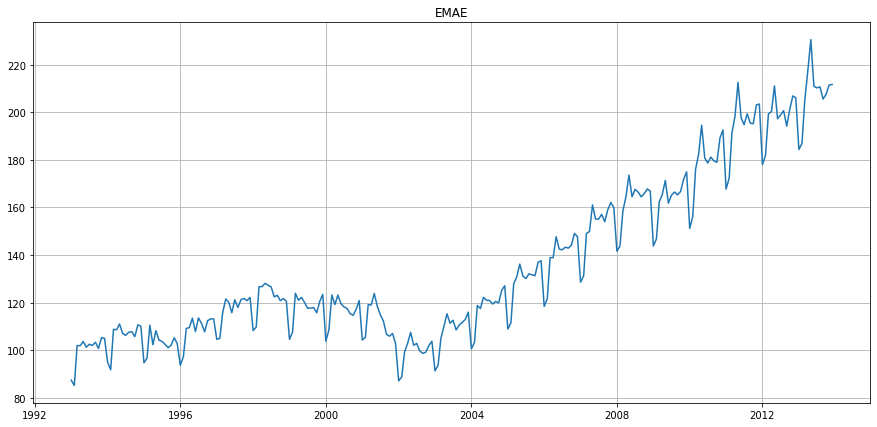

In [68]:
grafico(df.EMAE,'EMAE')

##  Dickey-Fuller Test

La hipotesis nula del DF es que hay una raiz unitaria. Busco rechazarla para que el proceso sea estacionario.

Lo siguiente de la documentacion de DF me dice que el pvalue es el segundo resultado. Lo llamo con [1]


From:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

Returns:  adf The test statistic.\
pvalue MacKinnon”s approximate p-value based on MacKinnon (1994, 2010).\
usedlag The number of lags used.\
nobsint The number of observations used for the ADF regression and calculation of the critical values. \
critical values  Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010). \
icbest The maximized information criterion if autolag is not None.\


In [69]:
sm.tsa.stattools.adfuller(df.EMAE)[1]

0.981988855855342

## Voy a modelar una tendencia y estacionalidad mensual, para intentar llevar la serie a un proceso estacionario 

Propongo primero

$$EMAE_t=\beta_0+\beta_1 t +\beta_1 t^2+ \sum_{m=1}^{11}dmes_m+\epsilon_t $$

In [70]:
df['t']=df.reset_index().index
df['t2']=df['t']**2
df['month']=df.index.month
df.head()

,EMAE,EMAERES,EMAETEND,t,t2,month
indice_tiempo,,,,,,
1993-01-01,87.389791,-10.032786,99.025500,0,0,1
1993-02-01,85.141646,-13.883853,113.900525,1,1,2
1993-03-01,101.928041,-11.972484,115.062437,2,4,3
1993-04-01,101.890240,-13.172196,120.537692,3,9,4
1993-05-01,103.674974,-16.862718,113.193716,4,16,5


Utilizo sintaxis de R para facilitar la creacion automatizada de dummies en base a una variable categórica

In [71]:
model=smf.ols(formula='EMAE~ t+ t2 + C(month)',data=df)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   EMAE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     276.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          1.64e-135
Time:                        01:29:54   Log-Likelihood:                -903.27
No. Observations:                 252   AIC:                             1835.
Df Residuals:                     238   BIC:                             1884.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.4515      2.502     38.

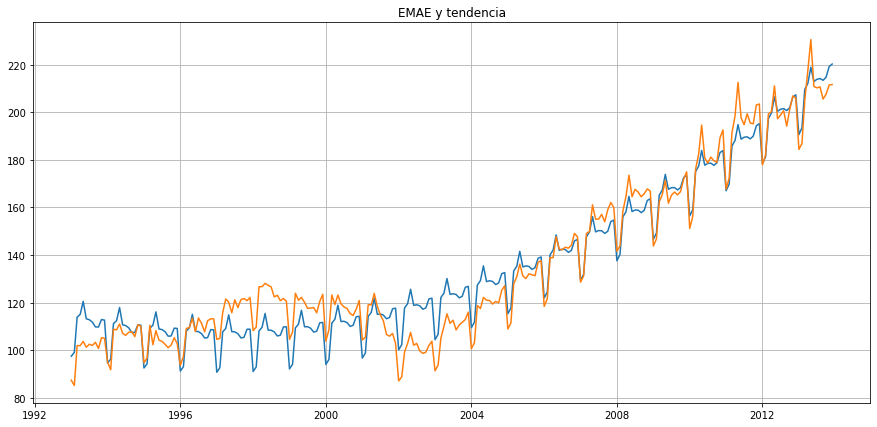

In [72]:
df['tendencia']=results.predict()
plt.figure(figsize=(15, 7))
plt.plot(df.tendencia)
plt.plot(df.EMAE)
plt.title('EMAE y tendencia')
plt.grid(True)
plt.show()

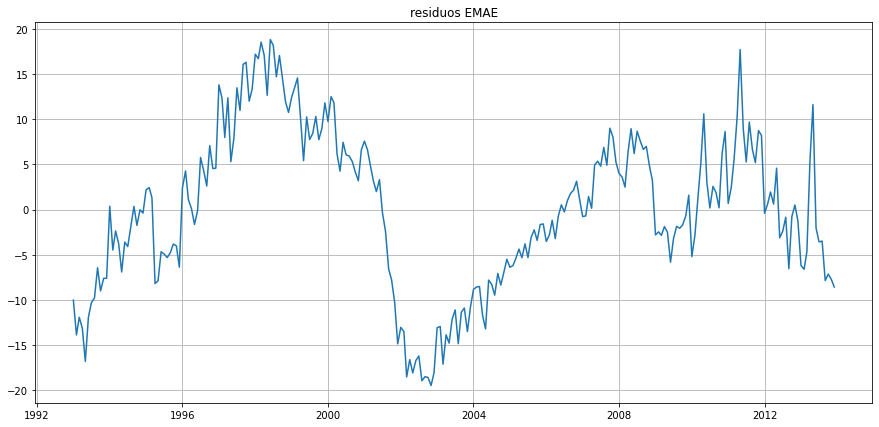

In [73]:
grafico(results.resid,'residuos EMAE')


Veamos el DF

In [74]:
sm.tsa.stattools.adfuller(results.resid)[1]

0.19957306298569572

In [75]:
df['EMAEresid']=results.resid

In [76]:
mod = AutoReg(df.EMAEresid, 1, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              EMAEresid   No. Observations:                  252
Model:                     AutoReg(1)   Log Likelihood                -648.780
Method:               Conditional MLE   S.D. of innovations              3.209
Date:                Fri, 16 Oct 2020   AIC                              2.356
Time:                        01:29:54   BIC                              2.398
Sample:                    02-01-1993   HQIC                             2.373
                         - 12-01-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.203      0.041      0.968      -0.389       0.405
EMAEresid.L1     0.9291      0.023     39.998      0.000       0.884       0.975
                                    Roots   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [77]:
mod = AutoReg(df.EMAEresid, 2, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              EMAEresid   No. Observations:                  252
Model:                     AutoReg(2)   Log Likelihood                -643.629
Method:               Conditional MLE   S.D. of innovations              3.176
Date:                Fri, 16 Oct 2020   AIC                              2.343
Time:                        01:29:54   BIC                              2.399
Sample:                    03-01-1993   HQIC                             2.366
                         - 12-01-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0272      0.201      0.136      0.892      -0.366       0.421
EMAEresid.L1     0.8088      0.062     12.941      0.000       0.686       0.931
EMAEresid.L2     0.1266      0.062      2.02

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


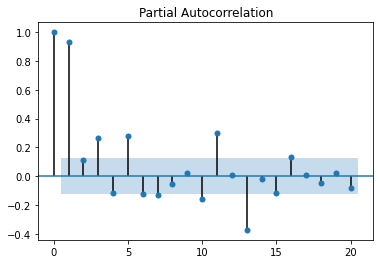

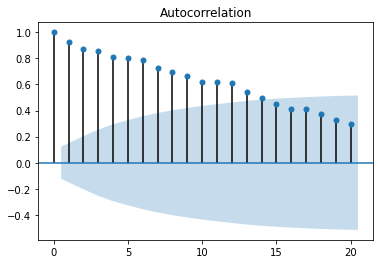

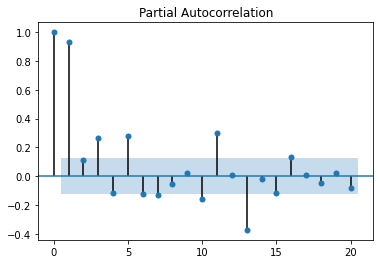

In [78]:
smt.graphics.plot_acf(df.EMAEresid, lags=20)
smt.graphics.plot_pacf(df.EMAEresid, lags=20)

In [79]:
sel = ar_select_order(df.EMAE,maxlag=2, trend='ct',seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   EMAE   No. Observations:                  252
Model:               Seas. AutoReg(2)   Log Likelihood                -646.133
Method:               Conditional MLE   S.D. of innovations              3.208
Date:                Fri, 16 Oct 2020   AIC                              2.459
Time:                        01:29:55   BIC                              2.685
Sample:                    03-01-1993   HQIC                             2.550
                         - 12-01-2013                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept     -16.3622      1.366    -11.976      0.000     -19.040     -13.684
trend           0.0109      0.006      1.774      0.076      -0.001       0.023
seasonal.1     16.8375      1.501     11.215    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


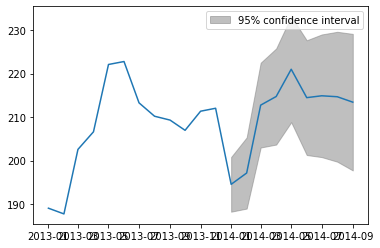

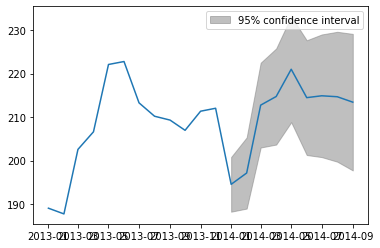

In [80]:
res.plot_predict(240,260)

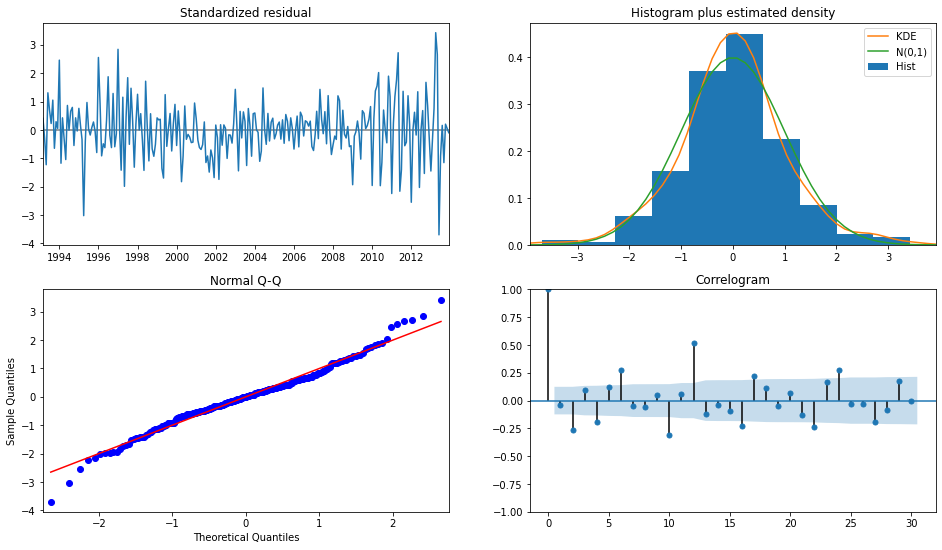

In [81]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [82]:
sm.tsa.stattools.adfuller((df.EMAE-df.EMAE.shift(1)).dropna(), regresults=True)

(-3.340587112564505,
 0.013158882464738248,
 {'1%': -3.4586084859607156,
  '10%': -2.57339565928848,
  '5%': -2.873972159235721},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7fe213bbf7b8>)